#**Traffic jam predictor**

#Librerías

In [ ]:
from sklearn import preprocessing 
from sklearn import tree 
from sklearn.tree import plot_tree
from IPython.display import Image 
import pydotplus
import matplotlib.pyplot as plt

#Importación de datos

In [ ]:
def getWeather(): 
    return ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Clear',  
            'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 
            'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy', 'Snowy']

def getTimeOfWeek(): 
    return ['Workday', 'Workday', 'Workday', 'Weekend', 'Weekend', 'Weekend', 
            'Workday', 'Workday', 'Workday', 'Weekend', 'Weekend', 'Weekend', 
            'Workday', 'Workday', 'Workday', 'Weekend', 'Weekend', 'Weekend'] 
 
def getTimeOfDay(): 
    return ['Morning', 'Lunch', 'Evening', 'Morning', 'Lunch', 'Evening', 
            'Morning', 'Lunch', 'Evening', 'Morning', 'Lunch', 'Evening', 
            'Morning', 'Lunch', 'Evening', 'Morning', 'Lunch', 'Evening'] 
 
def getTrafficJam(): 
    return ['Yes', 'No', 'Yes', 'No', 'No', 'No', 
            'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 
            'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']

#Preprocesamiento de los datos

Label encoder de scikit transforma valores categóricos de texto a números

In [ ]:
# Obtener los datos 
weather = getWeather() 
timeOfWeek = getTimeOfWeek() 
timeOfDay = getTimeOfDay() 
trafficJam = getTrafficJam() 
 
labelEncoder = preprocessing.LabelEncoder() 
 
# Codificar las características y las etiquetas
encodedWeather = labelEncoder.fit_transform(weather) 
encodedTimeOfWeek = labelEncoder.fit_transform(timeOfWeek)
encodedTimeOfDay = labelEncoder.fit_transform(timeOfDay) 

# Integrar las características
features = []
for i in range(len(encodedWeather)): 
    features.append([encodedWeather[i], encodedTimeOfWeek[i], encodedTimeOfDay[i]])

#Entrenamiento

In [ ]:
classifierTJ = tree.DecisionTreeClassifier() 
classifierTJ = classifierTJ.fit(features, trafficJam)

#Mostrar árbol

Generar una imagen del árbol en formato .png

In [ ]:
feature_names = ['Weather', 'Time of Week', 'Time of Day']
target_names = ['Yes', 'No'] 
dot_data = tree.export_graphviz(classifierTJ, filled=True, out_file=None, feature_names=feature_names, class_names=target_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 
graph.write_png("tree.png")


True

Desplegar el árbol

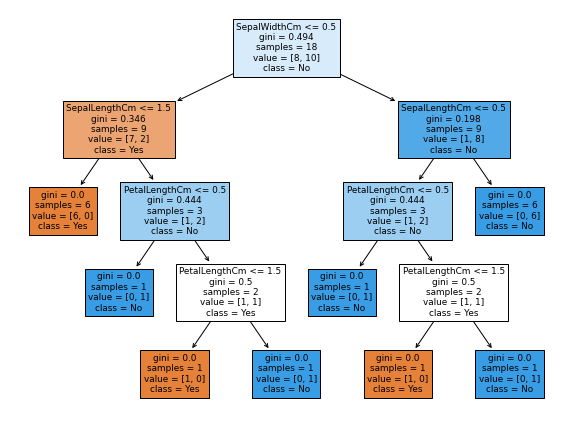

In [ ]:
plt.figure(figsize=(10,7.5))
plot_tree(classifierTJ, filled = True, feature_names=X.columns, class_names=target_names);

#Predicciones

In [ ]:
casosPredTJ = [[2, 0, 2], [0, 1, 1], [1, 1, 2], [2, 1, 0], [0, 0, 0]]
casosPredTJ = pd.DataFrame(casosPredTJ, index=range(1,6))
casosPredTJ.columns = feature_names
Predicciones = classifierTJ.predict(casosPredTJ)
casosPredTJ['Predicción'] = Predicciones
casosPredTJ

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Weather,Time of Week,Time of Day,Predicción
1,2,0,2,Yes
2,0,1,1,No
3,1,1,2,Yes
4,2,1,0,Yes
5,0,0,0,No


#**Category of plants in iris dataset**

#Librerías

In [ ]:
from sklearn import tree 
from sklearn.tree import plot_tree
from IPython.display import Image 
import pydotplus
import matplotlib.pyplot as plt
import pandas as pd

#Importación y exploración de datos

In [ ]:
irisdata = pd.read_csv('Iris.csv', index_col = 'Id')

print(irisdata.shape)
irisdata.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#Preprocesamiento de los datos
Dividir los datos en atributos y etiquetas

In [ ]:
X = irisdata.drop('Species', axis=1)
Y = irisdata['Species']


#Entrenamiento

In [ ]:
classifierIris = tree.DecisionTreeClassifier() 
classifierIris = classifierIris.fit(X, Y)

#Mostrar árbol

Generar una imagen del árbol en formato .png

In [ ]:
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_names = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'] 
dot_data = tree.export_graphviz(classifierIris, filled=True, out_file=None, feature_names=feature_names, class_names=target_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png()) 
graph.write_png("tree.png")


True

Desplegar el árbol

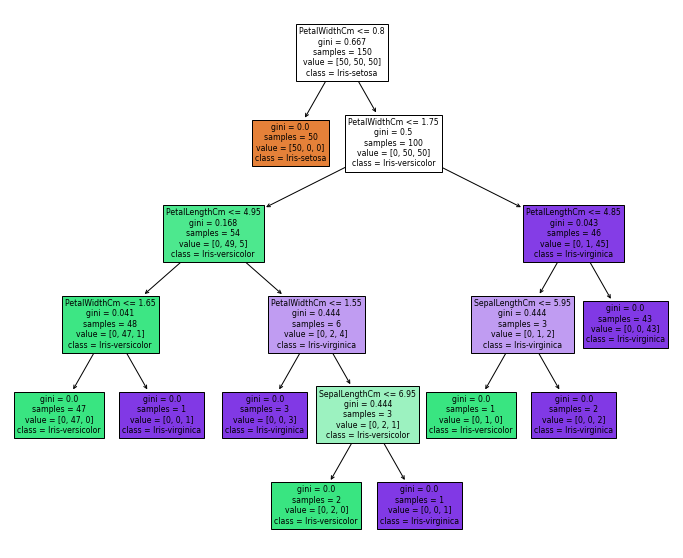

In [ ]:
plt.figure(figsize=(12,10))
plot_tree(classifierIris, filled = True, feature_names=X.columns, class_names=target_names);

#Predicciones

In [ ]:
casosPredIris = [[4.5, 2.7, 1.5, 1.0], [6.4, 4.0, 3.1, 2.1], [5.0, 2.5, 6.0, 1.5], [4.4, 4.4, 3.7, 1.4], [6.5, 4.1, 2.4, 0.2]]
casosPredIris = pd.DataFrame(casosPredIris, index=range(1,6))
casosPredIris.columns = X.columns
Predicciones = classifierIris.predict(casosPredIris)
casosPredIris['Predicción'] = Predicciones
casosPredIris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicción
1,4.5,2.7,1.5,1.0,Iris-versicolor
2,6.4,4.0,3.1,2.1,Iris-virginica
3,5.0,2.5,6.0,1.5,Iris-virginica
4,4.4,4.4,3.7,1.4,Iris-versicolor
5,6.5,4.1,2.4,0.2,Iris-setosa
